In [2]:
import numpy as np
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile
import matplotlib.pyplot as plt


# Repeat IQ Plot with simulators

In [13]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

qc.rx(np.pi/2, qr)
qc.measure(qr, cr)

provider = IBMProvider()
backend = provider.get_backend('ibmq_qasm_simulator')

transpiled_qc = transpile(qc, backend=backend)

job_id = backend.run(transpiled_qc, shots=1e2, meas_level=1, meas_return='single', memory=True ).job_id()


In [14]:
print(job_id) #"cmdx038te72g008jshg0"
job = provider.retrieve_job(job_id)
job.status()

ckdtb3c1rec1pkttpa3g


<JobStatus.DONE: 'job has successfully run'>

{'0': 51, '1': 49}
['1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0']


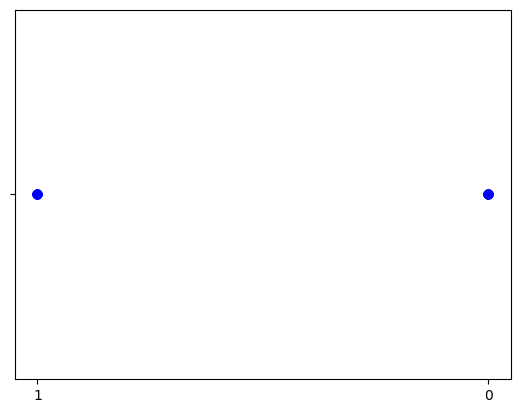

In [17]:
counts = job.result().get_counts()
memory = job.result().get_memory()

plt.plot(np.real(memory), np.imag(memory), 'o', color='blue', label='|+> Lagos 03.10')
#plt.plot(np.real(memory5050), np.imag(memory5050), 'o', color='red', label='|+> Lagos 02.09')

print(counts)
print(memory)

`=> The simulator does not have an IQ plane`